## Exploratory Data Analysis
### 2017 - NBA Social Media Data

In [8]:
'''
     File name: hw2_eda_gd_v2.ipynb
     Author: Guy Dotan
     Date: 01/30/2019
     Course: UCLA Stats 404
     Description: HW #2. Exploratory data analysis on the NBA stats and social media dataset.
 '''

import pandas as pd
import glob
from collections import Counter

path = 'social-power-nba/'
filelist = glob.glob(path + "/*.csv")
filename = [s.replace('.csv', '').replace(path,'') for s in filelist]

# creates dictionary of dataframes
dfs = {}
for x in range(len(filename)):
    dfs[filename[x]] = pd.read_csv(filelist[x])


### Dimensions of all datasets

In [9]:
dims_df = pd.DataFrame(columns=['filename','dimension'])
dims = []
for key,value in dfs.items():
    dims.append(str(value.shape))
    
dims_df['filename'] = dfs.keys()
dims_df['dimension'] = dims
print(dims_df)

                                     filename    dimension
0                                 nba_2017_br    (486, 30)
1                    nba_2017_team_valuations      (30, 2)
2                                nba_2017_elo      (30, 3)
3                        nba_2017_att_val_elo      (30, 9)
4                       nba_2017_endorsements      (10, 4)
5                           nba_2016_2017_100    (100, 63)
6   nba_2017_players_with_salary_wiki_twitter    (239, 42)
7                    nba_2017_twitter_players     (329, 3)
8             nba_2017_players_stats_combined    (446, 38)
9                   nba_2017_player_wikipedia  (162817, 5)
10           nba_2017_nba_players_with_salary    (342, 39)
11                               nba_2017_pie    (486, 22)
12          nba_2017_att_val_elo_with_cluster     (30, 10)
13                            nba_2017_salary     (449, 4)
14                        nba_2017_attendance      (30, 5)
15                           nba_2017_att_val      (30, 

I think I will focus my data exploration on dataset number 6. Although it is fewer rows, it includes a variety of information from player statistics, salaries, and social media presence. A quick look at the data is below.

In [ ]:
nbafull = dfs['nba_2017_players_with_salary_wiki_twitter']

nbafull.describe()

In [214]:
nbafull.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


In [ ]:
Counter(nbafull['AGE'])

In [212]:
Counter(nbafull['POSITION'])

Counter({19: 6,
         20: 12,
         21: 15,
         22: 19,
         23: 18,
         24: 19,
         25: 22,
         26: 19,
         27: 15,
         28: 22,
         29: 16,
         30: 12,
         31: 14,
         32: 9,
         33: 5,
         34: 3,
         35: 4,
         36: 5,
         38: 1,
         39: 2,
         40: 1})

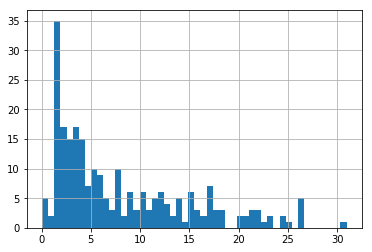

In [213]:
%matplotlib inline

nbafull['SALARY_MILLIONS'].hist(bins=50)

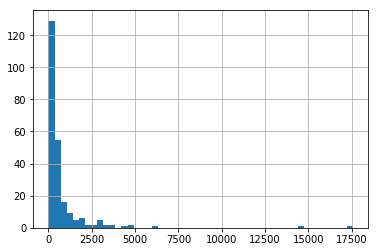

In [209]:
nbafull['PAGEVIEWS'].hist(bins=50)

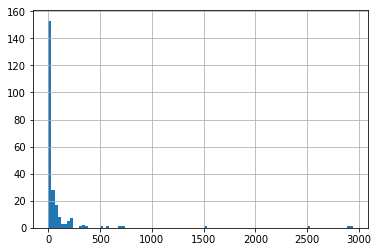

In [210]:
nbafull['TWITTER_RETWEET_COUNT'].hist(bins=100)

### Potential modeling approaches

There are 16 different datasets that came with this Kaggle set. Fortunately some of them are an already merged combination of them. I think the merged dataset that I want to look at is the one that combines player statistics with their social media and salary.

From the first histogrma we see that the Salary has a nice distribution that could be modeled. The histograms of Wikipedia views and Twitter retweets is much more skewed. So we would have to do some transformations before modeling. We have some interesting categorical variables such as AGE and POSITION. I think it would be interesting to see if correlations exist between age and a player's social media presence. Or if the presence is more closely related to a player's statistics or salary.